In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from DataSet import *
import os

import sys
sys.path.append("..")
import TargetApplicationScope

%matplotlib notebook

# Compiling/Sampling of Data 

### Random Generation
Coordinates: are randomly generated 
Datetime: points are randomly generated between a range in the past 
Speed: generate based on RoadTypeSampled {todo}

### Multivariate 
Elevation: API generate based on coordinates
Temperature: sampling
RainSensor 

### GTSBD:
SignType: labelled from the dataset






In [25]:
annoted_test_path = "/Users/luciaeve/Documents/EMSE/KAISERSLAUTERN/THESIS/code/CompiledCode/SCOPE_MODEL/input_files/UC1_Testset_Germany/contextInfo.csv"

In [26]:

exists = os.path.isfile(annoted_test_path)
if exists:
    # Store configuration file values
    print("File exists")
    data_set = pd.read_csv(annoted_test_path)
else:
    print("File does not exist")
    data_set = generate_dataset(annoted_test_path)
    data_set.to_csv("data/generated_data.csv")

File exists


In [27]:
t = TargetApplicationScope.TargetApplicationScope()
lookup_table = t.__dict__
appropriate_test_cases = 5

In [28]:
selected_sample = 2000
chosen_idx = np.random.choice(selected_sample, replace=False, size=selected_sample)
df_trimmed = data_set.iloc[chosen_idx]
print(df_trimmed.describe())


          LATITUDE    LONGITUDE  ORIENTATION        LEVEL  GENERAL_TRAFFIC  \
count  2000.000000  2000.000000  2000.000000  2000.000000      2000.000000   
mean     50.849185     9.937680   174.888500   240.852500         4.499450   
std       1.778795     2.069873   105.576049   207.261512         2.259092   
min      47.410000     6.010000     0.000000    -4.000000         1.500000   
25%      49.330000     8.290000    86.000000    57.000000         2.400000   
50%      50.950000     9.765000   179.000000   183.000000         4.900000   
75%      52.230000    11.520000   264.000000   403.000000         6.000000   
max      54.960000    14.790000   360.000000  1135.000000        10.000000   

       APPROACHING_TRAFFIC  PARALLEL_TRAFFIC  GRADIENT  VEHICLESPEED  \
count          2000.000000       2000.000000       0.0    2000.00000   
mean              4.499450          4.499450       NaN      49.44250   
std               2.259092          2.259092       NaN      28.93979   
min      

# Coverage/Sufficiency aspects

### Range-based Parameters
Verifies parameters fit between the TAS application_scope {min/max_values}



In [29]:
## Range related parameters: just checking min & max
def return_min_max(column):
    """ returns the max & min on column [min, max]"""
    return [min(column), max(column)]


def check_range(tas_parms, column, sufficency = 0 ):
    min_max = return_min_max(column)
    for key in tas_parms:
        if "min" in key:
            if tas_parms[key] <= min_max[0]:
                sufficency = sufficency + 0.5
        if "max" in key:
            if tas_parms[key] >= min_max[1]:
                sufficency = sufficency + 0.5
    return sufficency

In [30]:
def validate_range_based_params(data, test_cases):
    """
     Range-based:
    + temperatureRange(temperature, min_temp, max_temp):
    + velocityRange(min_velocity, max_velocity)
    + rainSensorRange(min_rain, max_rain): TODO:
    + elevationSensorRange(min_elevation, max_elevation)
    + yearRange(year, timestamp)
    """
    validation = check_range(lookup_table['temperature'], data['TEMPERATURE']) + \
                 check_range(lookup_table['velocity'], data['VEHICLESPEED'] )
    return validation/test_cases

validate_range_based_params(df_trimmed, 2)

1.0


1.0

## Density-Based Parameters 

### Coordinates
-- plots Density Based Coordinates
-- verifies there are neighbors within 4km squared {how many neighbors?}
@todo: need to add that they are along the border of Germany


## Neighbors within 4km distance

uses the KDTree with the Haversine & KD tree 
@ToDo: Needs to be optimised



# Density-Based Parameters 

### Datetime

### count of the intervals and missing data

In [33]:
from datetime import datetime

def count_of_underthreshold(time_range, df, count):
    resample = df.resample(time_range).count()
    return len(resample[resample['Filename'] <= count])


data_set['dt'] =  pd.to_datetime(data_set['TIMESTAMP'], unit='s')
data_set.index = data_set['dt']


ValueError: non convertible value 2017-03-31 09:00 with the unit 's'

In [27]:
# 60 minutes {60 minutes, 1 value}
print(count_of_underthreshold('60T', full_data_set, 1))

# 120 minutes 
print(count_of_underthreshold('120T', full_data_set, 1))

## 240 minutes 
print(count_of_underthreshold('240T', full_data_set, 1))


4904
7048
899
38


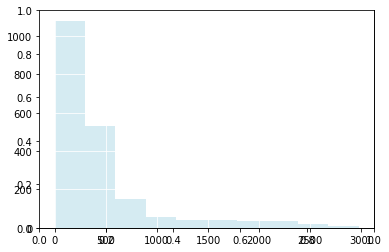

In [30]:
fig, ax = plt.subplots()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(df_trimmed['Elevation'], histtype='stepfilled', fc='lightblue', alpha=0.5);


# Representativeness aspects

<IPython.core.display.Javascript object>


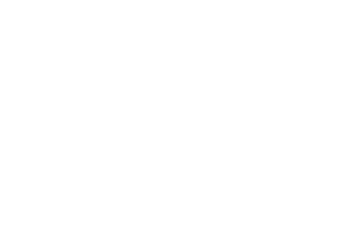

<IPython.core.display.Javascript object>

KeyError: 'Temperature'

In [34]:
## can use some of the Weather sampling code
df_trimmed.hist()


fig, ax = plt.subplots()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(df_trimmed['Temperature'], histtype='stepfilled', fc='lightblue', alpha=0.5);

